In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path) 

merge_df =pd.merge(mouse_df, study_df, on="Mouse ID", how ="inner", suffixes = ("_mouse", "_data"))
merge_df

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
merge1_df =(pd.merge(mouse_df, study_df, on="Mouse ID", how ="outer", suffixes = ("_mouse", "_data")))
merge1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
merge = merge_df
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
merge_df.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          25         40.146450           0                   1
                                                        30         40.668343           1                   1
                        

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge = merge[["Mouse ID", "Timepoint"]].drop_duplicates
merge()




,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [8]:
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
clean_study_data_complete = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
duplicate_mouse_data = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==True]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
unique_number = len(clean_study_data_complete["Mouse ID"].unique())

unique_number

248

## Summary Statistics

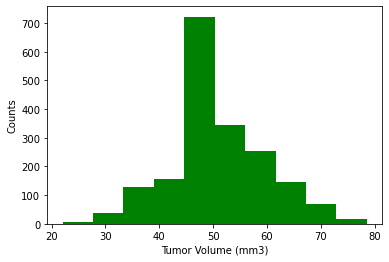

Mean of the study results is: 50.44
Median of the study results is: 48.93
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=0.617598719875551, pvalue=0.7343280908803839)


In [12]:
plt.hist(clean_study_data_complete['Tumor Volume (mm3)'],color='green',bins=10)
        
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(clean_study_data_complete['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(clean_study_data_complete['Tumor Volume (mm3)'].sample(100),))
                                                                          
                   

In [13]:

s_stats = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen").count())

s_stats["Mean"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
s_stats["Median"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
s_stats["Standard Deviation"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
s_stats["Variance"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
s_stats["SEM"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
s_stats = s_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
s_stats = s_stats.rename(columns = {"Mouse ID" : "Trials"})

s_stats.head()



,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_study_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','std','var','sem'] })

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

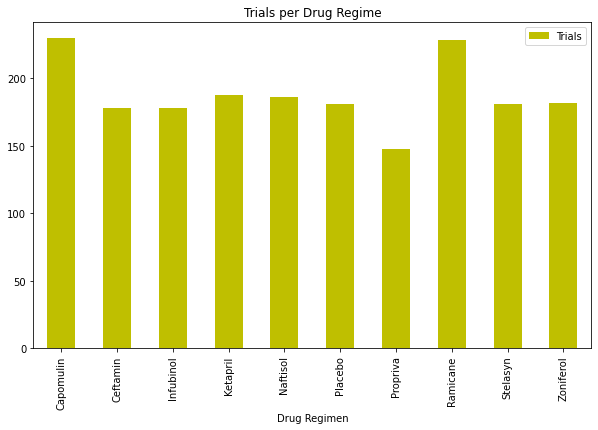

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints = s_stats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(10,6), color = "y", legend=True)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

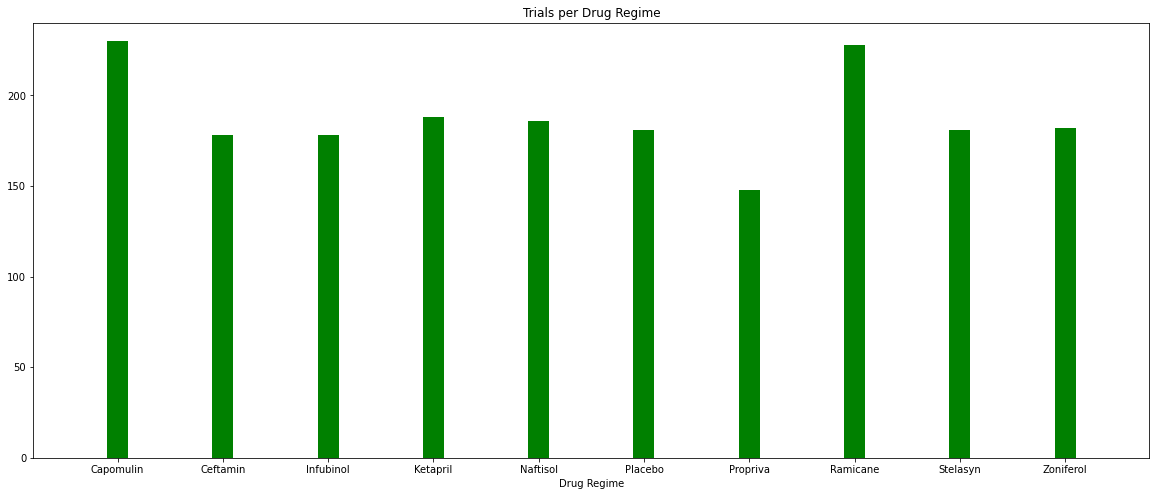

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,8))
plt.bar(x_axis, datapoints["Trials"], color = "g", width = .20)
plt.xticks(tick_locations, datapoints.index.values, rotation="horizontal")

# Set x and y limits
plt.xlim(-0.80, len(x_axis)-.20)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group =clean_study_data_complete.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()


,Sex
Sex,
Female,922
Male,958


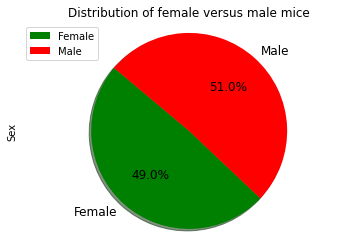

In [18]:
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=12, colors =["g","r"],legend =True)

plt.axis("equal")
plt.show()

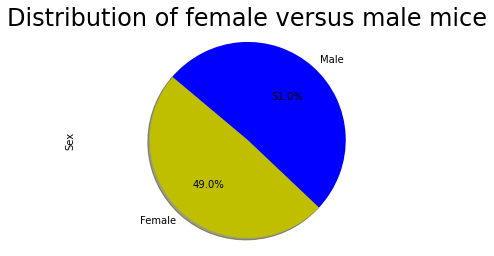

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["y", "b"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 20
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

In [ ]:
Quartiles, Outliers and Boxplots¶

In [25]:
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(four_drug_list)]
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3) 
four_last_tumor
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstack.head()
counter = 0
for drug in four_drug_list:
    quartiles = four_drug_list[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

TypeError: list indices must be integers or slices, not str

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

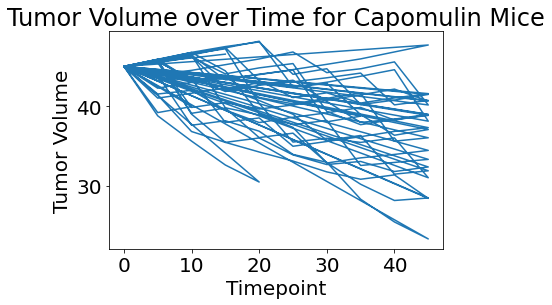

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_study_data_complete.loc[(clean_study_data_complete["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()


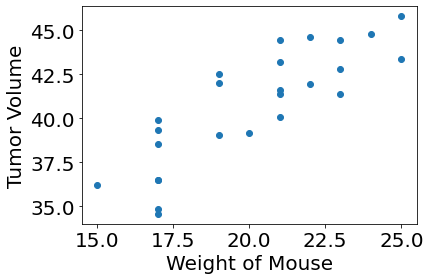

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_df = clean_study_data_complete.loc[(clean_study_data_complete["Drug Regimen"] == "Capomulin"),:]

correlation = st.pearsonr(Capomulin_df["Weight (g)"],Capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


The r-squared is: 0.5256995552077166
The equation of the regression line is: y = 0.96x + 21.49


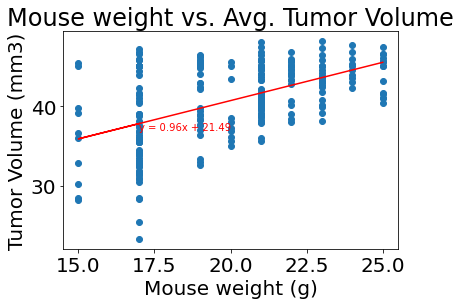

In [38]:
x_values = Capomulin_df["Weight (g)"]
y_values = Capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()